In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

In [2]:
data=pd.read_csv('genres_v2.csv')

In [3]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [4]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [5]:
data.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle
42304,0.529,0.945,9,-5.862,1,0.0615,0.001890,0.000055,0.4140,0.134,...,6MAAMZImxcvYhRnxDLTufD,spotify:track:6MAAMZImxcvYhRnxDLTufD,https://api.spotify.com/v1/tracks/6MAAMZImxcvY...,https://api.spotify.com/v1/audio-analysis/6MAA...,162161,4,hardstyle,NaN,20999.0,Best of Hardstyle 2020


In [6]:
data.isnull()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
data.corr

<bound method DataFrame.corr of        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumental

##  Let's look closer at data with pair plot

In [8]:
cols=list(data.columns[11:])
del cols[7]

In [9]:
df=copy.deepcopy(data)
df.drop(columns=cols,inplace=True)

In [10]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

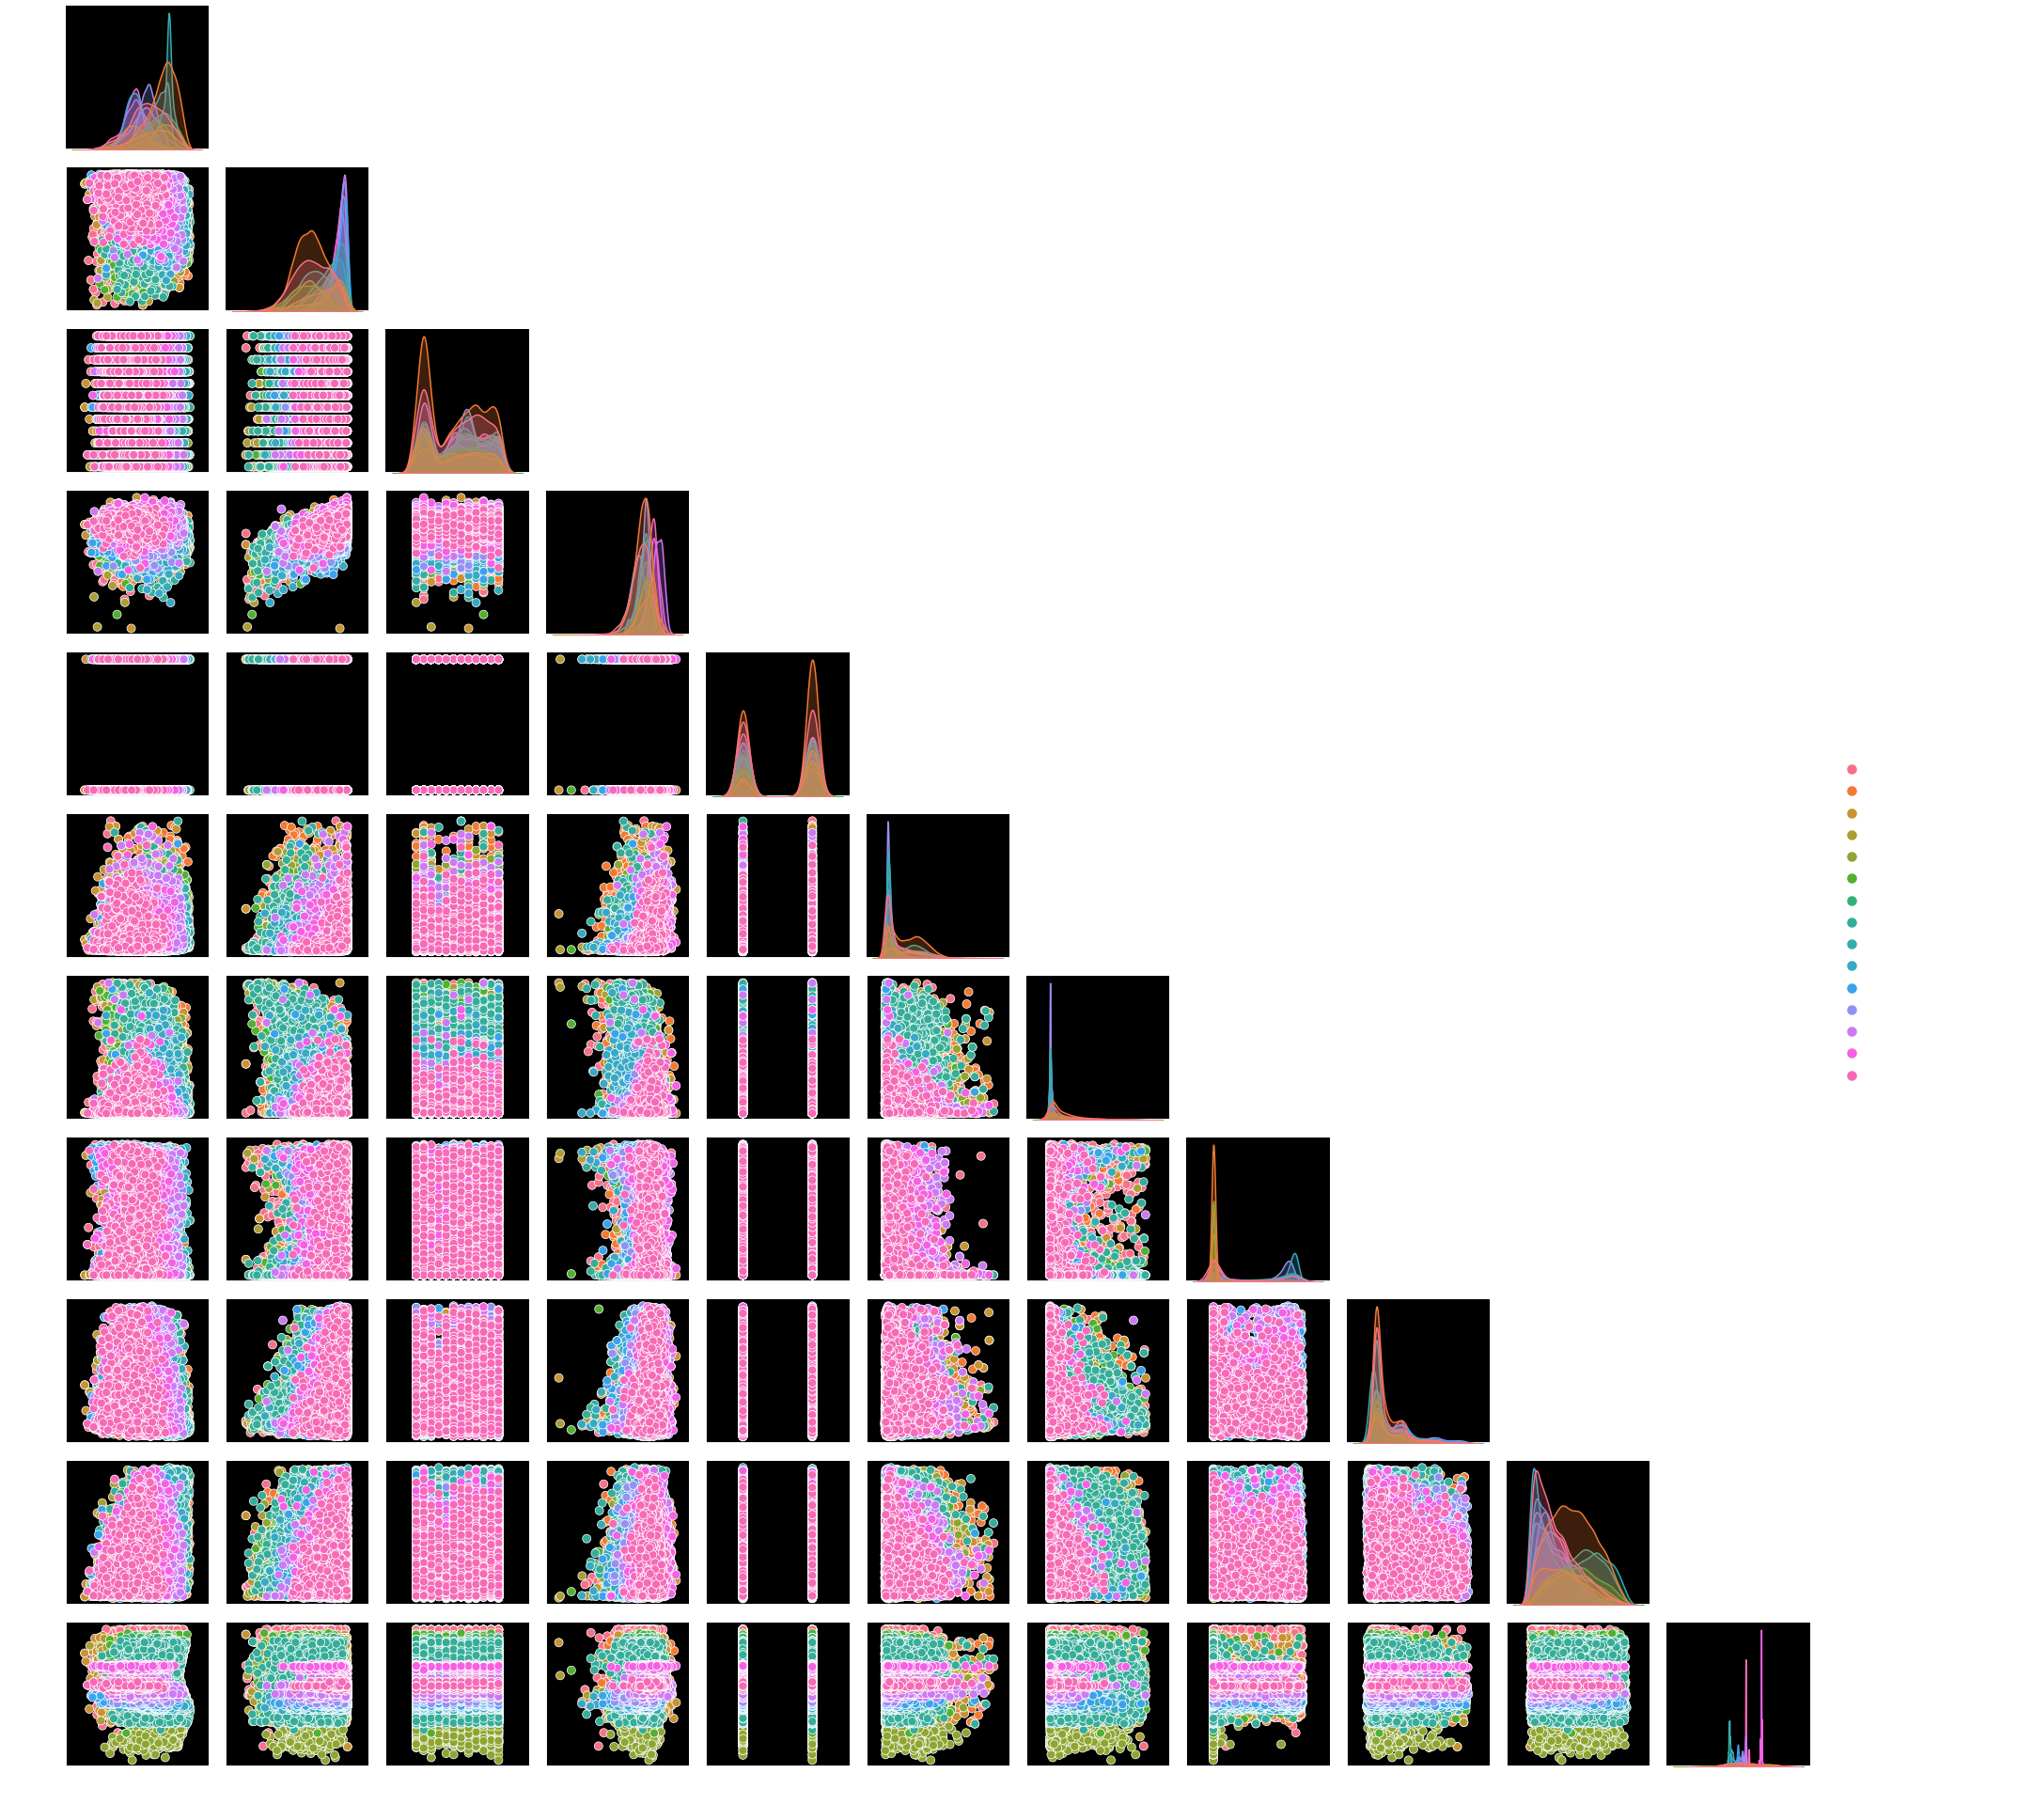

In [11]:
sns.pairplot(df,corner=True,hue='genre')

##  Let's have a look at the average time of a song

In [13]:
px.box(data_frame=data,y='duration_ms',color='genre')


###   Well we can clearly see that most of the genres have their own time ranges "pystrance" is mostly longer and we can see that "trap" music is of lower timespan

##  HeatMap of the data

In [14]:
data.drop('Unnamed: 0',axis=1,inplace=True)

'x=list(data.corr().columns)\ny=list(data.corr().index)\nvalues=np.array(data.corr().values)\nfig = go.Figure(data=go.Heatmap(z=values,x=x,y=y,hoverongaps = False))\nfig.show()'

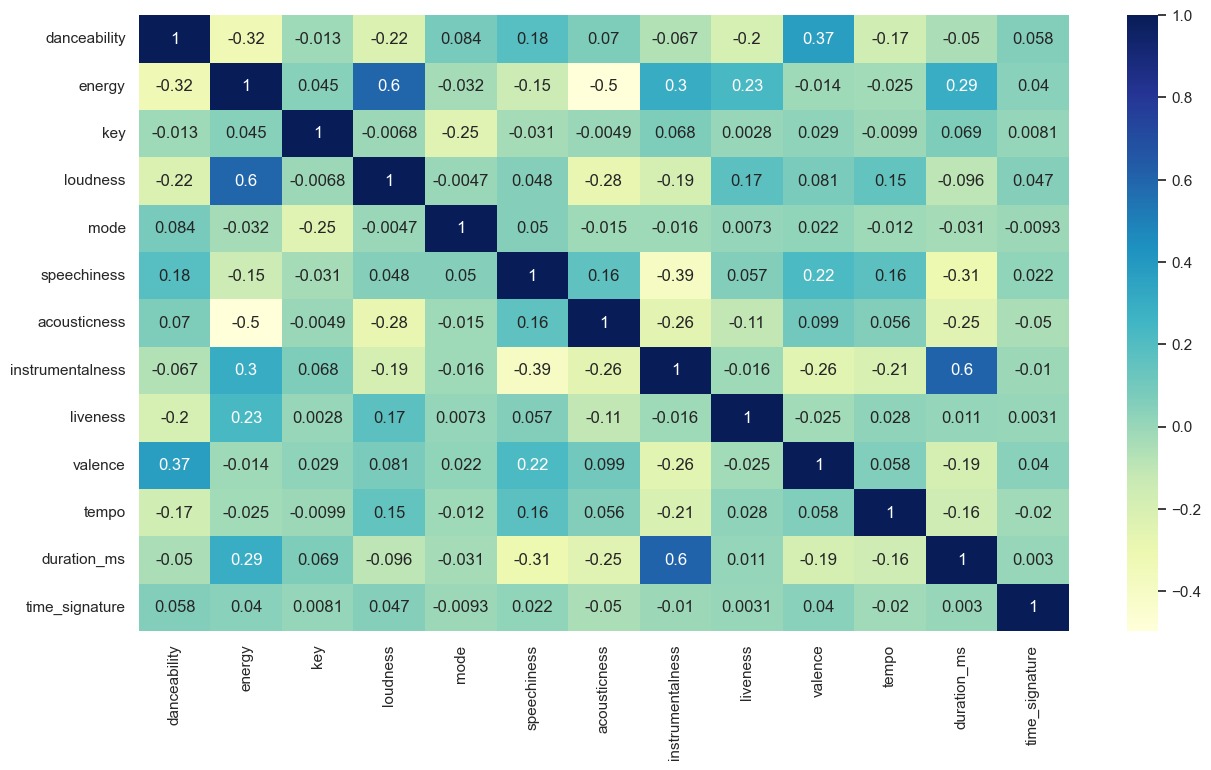

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
'''x=list(data.corr().columns)
y=list(data.corr().index)
values=np.array(data.corr().values)
fig = go.Figure(data=go.Heatmap(z=values,x=x,y=y,hoverongaps = False))
fig.show()'''

##  Let's Make A Recommendation System....
###   Over here we are gonna use different methods to find the closest songs to the one that user have liked :)

##  Remove all the rows with no song name

In [16]:
data=data.dropna(subset=['song_name'])

##  Need to Preprocess the Data
###   Question arises why do we need to standardize the data ??
Answer : You see that the data has columns like duration ms whose distance difference can be high causing lot of change in the answer we want every field to contribute the same to the distance (euclidean) hence we have to standardize the data .

In [17]:
# Creating a new dataframe with required features
df=data[data.columns[:11]]
df['genre']=data['genre']
df['time_signature']=data['time_signature']
df['duration_ms']=data['duration_ms']
df['song_name']=data['song_name']

In [18]:
x=df[df.drop(columns=['song_name','genre']).columns].values
scaler = StandardScaler().fit(x)
X_scaled = scaler.transform(x)
df[df.drop(columns=['song_name','genre']).columns]=X_scaled

##  Recommendation System Using Euclidean Distance

In [25]:
##Euclidean distance is the shortest between the points irrespective of the dimensions.
##It gives the nearest recommendation of asked feature.

In [19]:
# This is a function to find the closest song name from the list
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]

In [20]:
# Making a weight matrix using euclidean distance
def make_matrix(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.euclidean(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])
    
    

In [21]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
make_matrix(df,a,b)

Please enter The name of the song :tum mere
Please enter the number of recommendations you want: 10
The song closest to your search is : Can't Hold On
Outlawz
Born Day
Facade Records
20 Joints
Be Easy
Nightcrawler (feat. Method Man)
Unbelievable - 2005 Remaster
Dicka Was
Always On Time
N 2 Gether Now


## Recommendation System Using Cosine Similarity

In [24]:
##Similarity compares & quantifies the similarity between two items & recommend as you may also like.
##Cosine Similarity ranges from (-1 to 1), 1 represent same items & -1 represent items which are not same.

In [22]:
def make_matrix_cosine(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])
    


In [23]:
c=input('Please enter The name of the song :')
d=int(input('Please enter the number of recommendations you want: '))
make_matrix_cosine(df,c,d)


Please enter The name of the song :venom
Please enter the number of recommendations you want: 10
The song closest to your search is : Venom
Fear None
Backpack
You've come to the right place for a burial!
Play or Die
Pictures
Bag of Dope
Get Back
Pump Fake
50 Reasons Why
Hell Awaits
